# High Resolution Measurements of Face-to-Face Contact
# Patterns in a Primary School
Day 1 and 2, comparison

In [1]:
# Commençons par importer les  librairies utiles ainsi que les données, sous forme de réseau.

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G01 = nx.read_gexf("data/sp_data_school_day_1_g.gexf")
G02 = nx.read_gexf("data/sp_data_school_day_2_g.gexf")

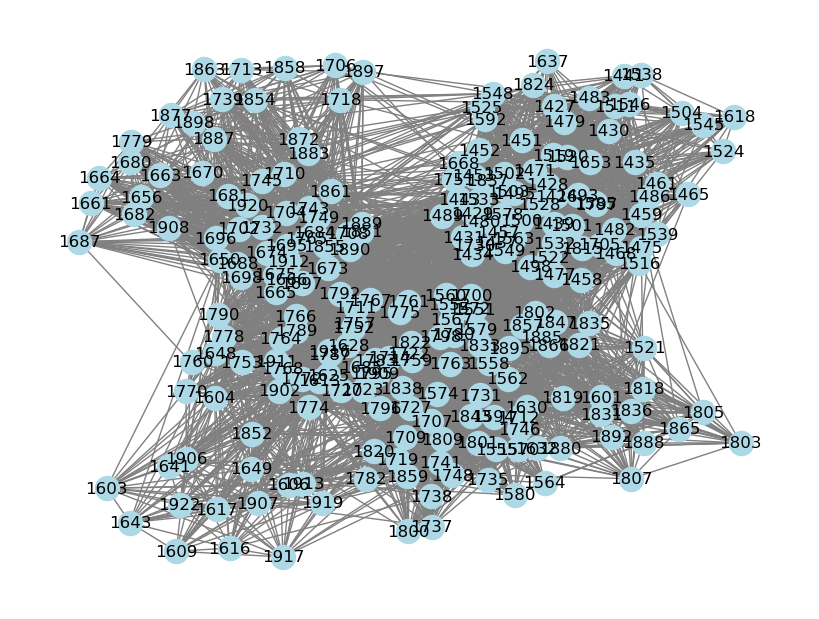

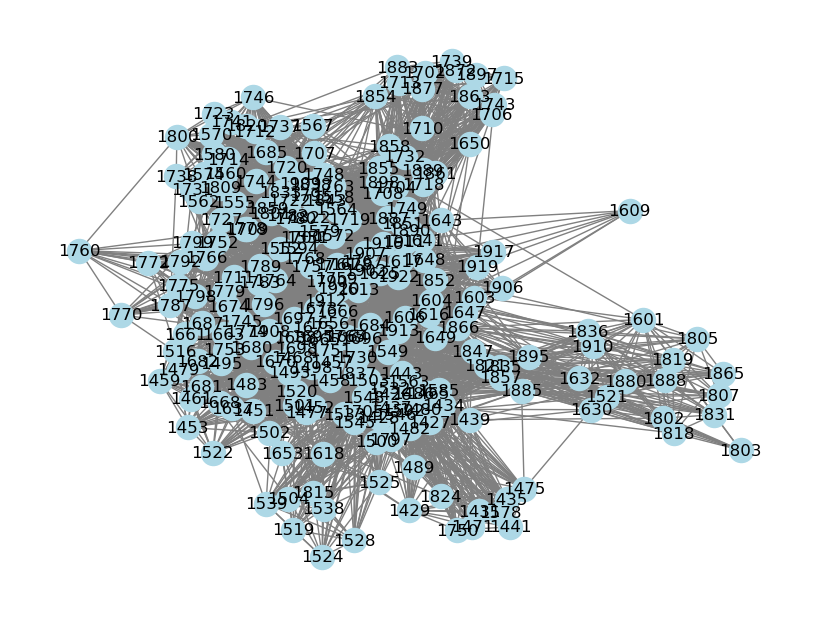

In [2]:
# Première représentation de notre graphe, première idée.

plt.figure(figsize=(8,6))
nx.draw(G01, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

plt.figure(figsize=(8,6))
nx.draw(G02, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

### Graphe simple
Une seule arête entre les noeuds mais pondérée par la somme des durées des contacts entre les noeuds

In [3]:
# Pour le graphe du jour 1
print("Jour 1:")
print(G01.nodes(data=True))
print(G01.edges(data=True))

# Pour le graphe du jour 2
print("Jour 2 :")
print(G02.nodes(data=True))
print(G02.edges(data=True))

Jour 1:
[('1789', {'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -105.46777, 'y': -61.034737, 'z': 0.0}}, 'label': '1789'}), ('1780', {'classname': '3A', 'gender': 'M', 'viz': {'color': {'r': 117, 'g': 131, 'b': 255}, 'size': 10.0, 'position': {'x': 37.34756, 'y': 63.289124, 'z': 0.0}}, 'label': '1780'}), ('1782', {'classname': '3A', 'gender': 'M', 'viz': {'color': {'r': 117, 'g': 131, 'b': 255}, 'size': 10.0, 'position': {'x': -228.26913, 'y': 181.72375, 'z': 0.0}}, 'label': '1782'}), ('1783', {'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -64.468575, 'y': 80.36716, 'z': 0.0}}, 'label': '1783'}), ('1787', {'classname': '1A', 'gender': 'F', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -138.05147, 'y': -21.946629, 'z': 0.0}}, 'label': '1787'}), ('1546', {'classname': '4A', 'gender': 'F', 'viz': {'color': {'r': 252, 'g': 97, 

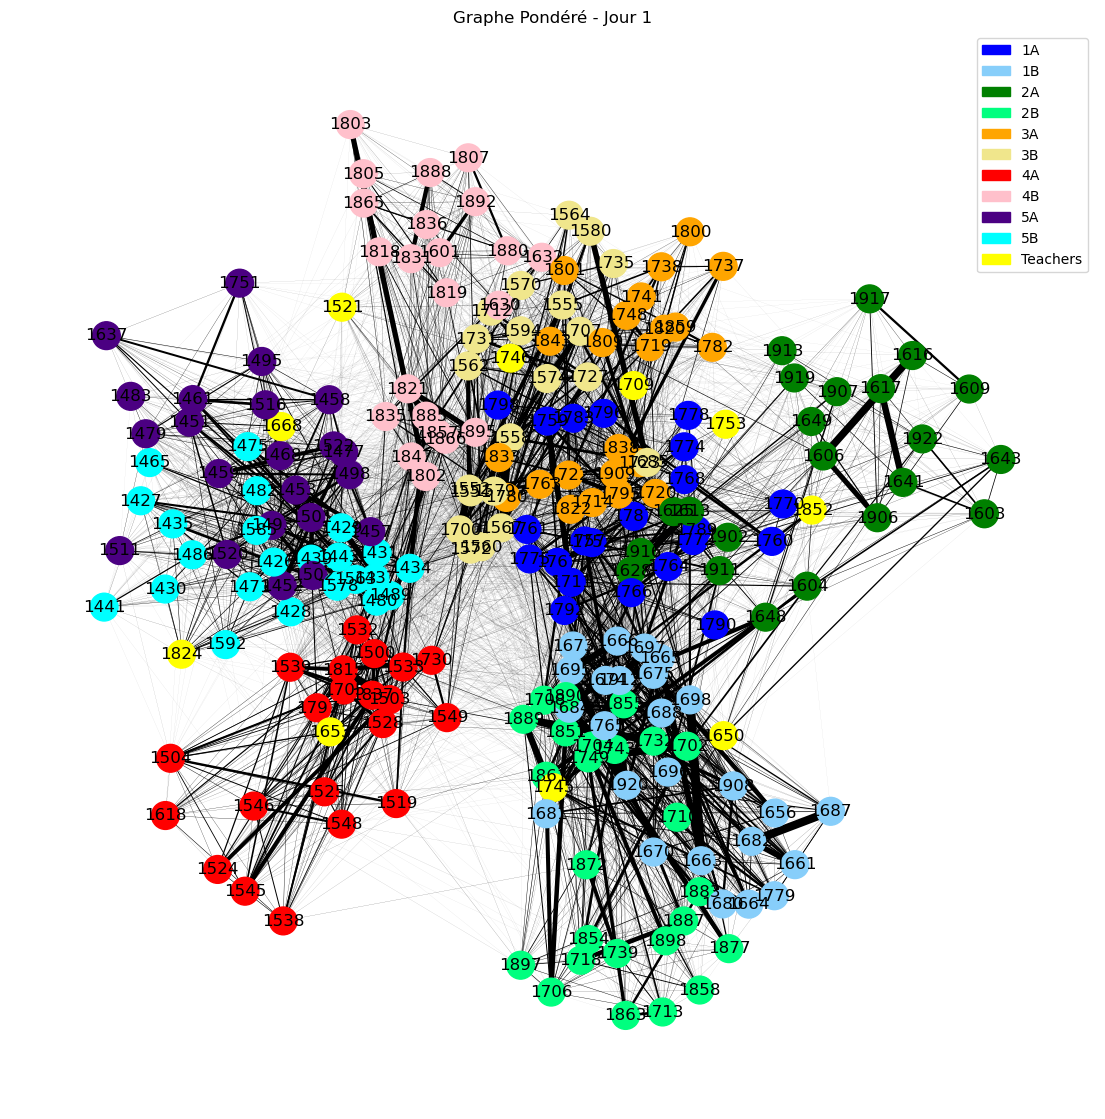

In [4]:
# Construction d’un graphe pondéré JOUR 1

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors


G1 = nx.Graph()

# --- Ajout des nœuds avec attributs ---
for n, data in G01.nodes(data=True):
    
    G1.add_node(n, classname=data.get("classname", "NA"))

# --- Ajout des arêtes pondérées ---
# Notons w la durée de chaque contact (qui sert de poids)

for u, v, data in G01.edges(data=True):

            
    w = data.get("duration", 1)
    G1.add_edge(u, v, duration=w)

# Couleurs
color_map = {
    "1A": "blue",
    "1B": "lightskyblue",
    "2A": "green",
    "2B": "springgreen",
    "3A": "orange",
    "3B": "khaki",
    "4A": "red",
    "4B": "pink",
    "5A": "indigo",
    "5B": "cyan",
    "Teachers" : "yellow"
}

node_colors = [
    color_map.get(G1.nodes[n].get("classname", "PAT"), "gray")
    for n in G1.nodes()
]

plt.figure(figsize=(14, 14))

legend_handles = [
    mpatches.Patch(color=color, label=cat)
    for cat, color in color_map.items()
]
plt.legend(handles=legend_handles)

# Largeurs proportionnelles et !!! on ne tient compte que des contacts supérieurs à 2 minutes, pour plus de lisibilité (et comme proposé dans l'article)
edges = G1.edges()
if w > 120:
    edge_weights = [G1[u][v]["duration"] for u, v in edges]
    max_w = max(edge_weights)
    edge_widths = [10 * w / max_w for w in edge_weights]

#note: Pourquoi *10 dans le calcule de la pondération?

nx.draw(
    G1,
    with_labels=True,
    node_color=node_colors,
    node_size=400,
    width=edge_widths
)

plt.title("Graphe Pondéré - Jour 1")
plt.show()







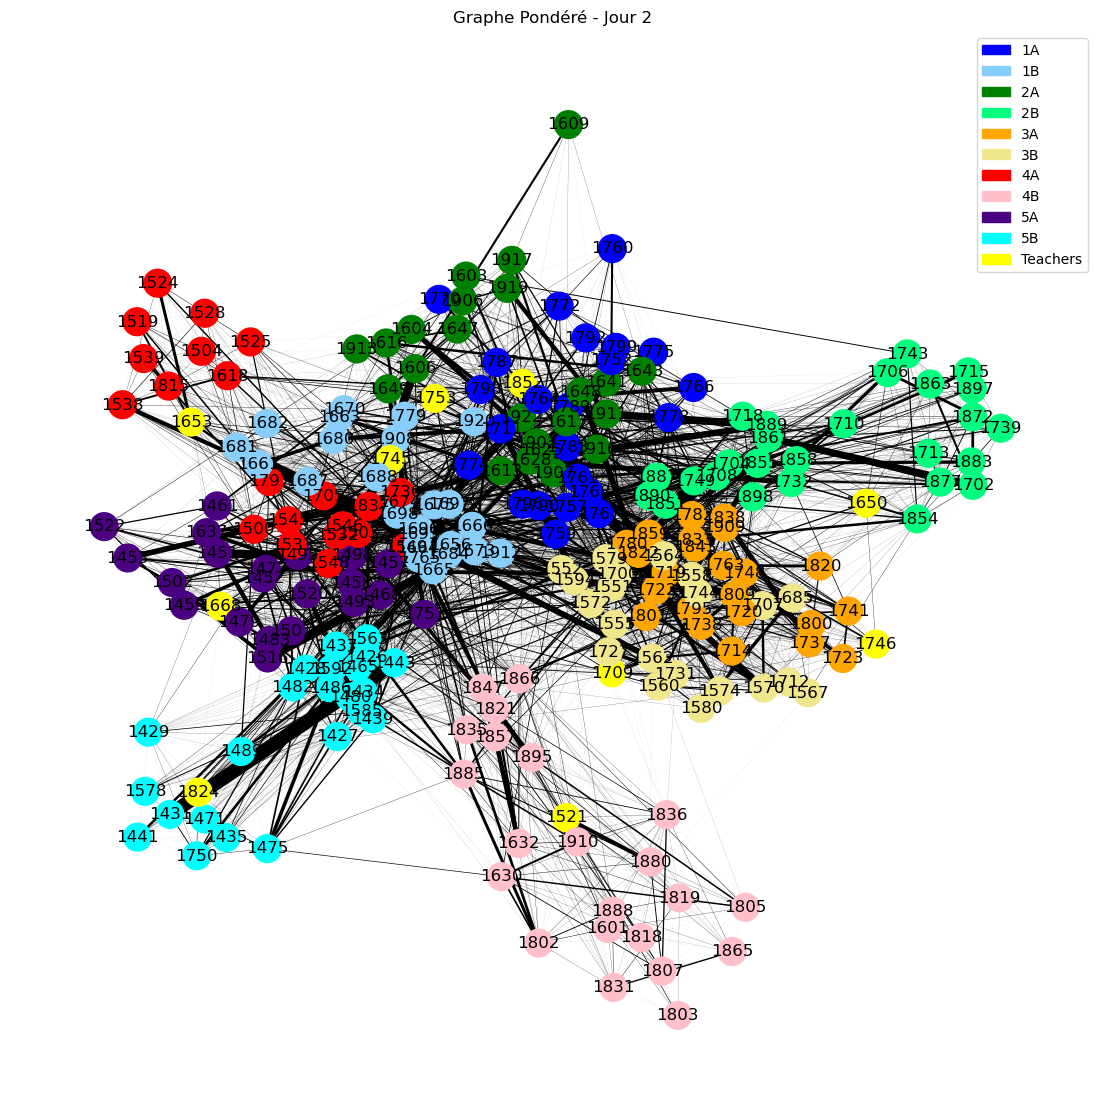

In [5]:
# Construction d’un graphe pondéré JOUR 2

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors


G2 = nx.Graph()

# --- Ajout des nœuds avec attributs ---
for n, data in G02.nodes(data=True):
    
    G2.add_node(n, classname=data.get("classname", "NA"))

# --- Ajout des arêtes pondérées ---
# Notons w la durée de chaque contact (qui sert de poids)

for u, v, data in G02.edges(data=True):
    
    w = data.get("duration", 1)
    G2.add_edge(u, v, duration=w)

# Couleurs
color_map = {
    "1A": "blue",
    "1B": "lightskyblue",
    "2A": "green",
    "2B": "springgreen",
    "3A": "orange",
    "3B": "khaki",
    "4A": "red",
    "4B": "pink",
    "5A": "indigo",
    "5B": "cyan",
    "Teachers" : "yellow"
}

node_colors = [
    color_map.get(G2.nodes[n].get("classname", "PAT"), "gray")
    for n in G2.nodes()
]

plt.figure(figsize=(14, 14))

legend_handles = [
    mpatches.Patch(color=color, label=cat)
    for cat, color in color_map.items()
]
plt.legend(handles=legend_handles)

# Largeurs proportionnelles
edges = G2.edges()
if w > 120:
    edge_weights = [G2[u][v]["duration"] for u, v in edges]
    max_w = max(edge_weights)
    edge_widths = [10 * w / max_w for w in edge_weights]

#note: Pourquoi *10 dans le calcule de la pondération?

nx.draw(
    G2,
    with_labels=True,
    node_color=node_colors,
    node_size=400,
    width=edge_widths
)

plt.title("Graphe Pondéré - Jour 2")
plt.show()







In [6]:
print("Diamètre du Graphe 1:" , nx.diameter(G1))
print("Diamètre du Graphe 1:" , nx.diameter(G2))

Diamètre du Graphe 1: 3
Diamètre du Graphe 1: 3


QUELQUES ANALYSES

A. Distribution de degré


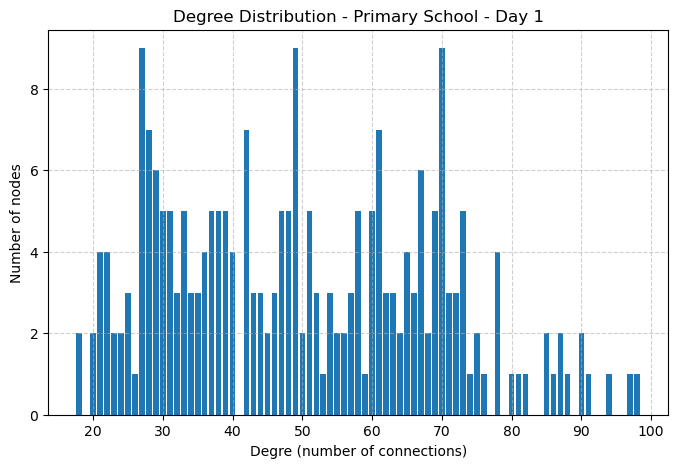

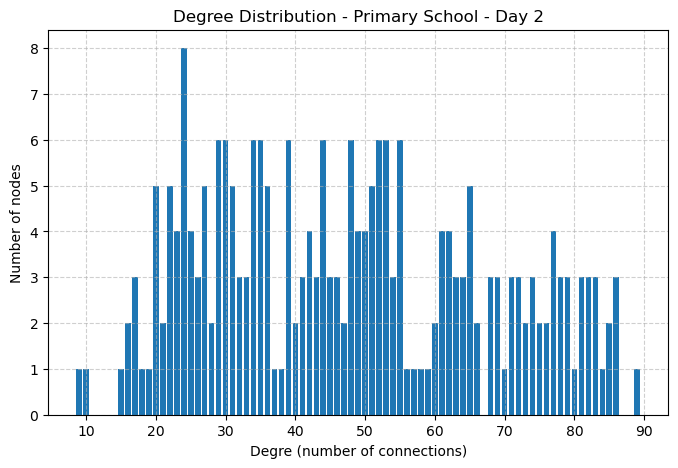

In [7]:
# Pour comprendre la structure du réseau, regardons sa distribution de degrés.

degrees1=[d for n , d in G1.degree()]

plt.figure(figsize=(8,5))
plt.hist(degrees1, bins=range(min(degrees1),max(degrees1)+2), align ='left', rwidth=0.8)

plt.title("Degree Distribution - Primary School - Day 1")
plt.xlabel("Degre (number of connections)")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle = '--', alpha= 0.6)
plt.show()



degrees2=[d for n , d in G2.degree()]

plt.figure(figsize=(8,5))

plt.hist(degrees2, bins=range(min(degrees2),max(degrees2)+2), align ='right', rwidth=0.8)

plt.title("Degree Distribution - Primary School - Day 2")
plt.xlabel("Degre (number of connections)")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle = '--', alpha= 0.6)
plt.show()

Calcul du coefficient de Pearson pour voir la corrélation entre les jours 1 et 2

In [8]:
from scipy.stats import pearsonr

#Coefficient de Pearson: entre le nombre de contacts d'un individu le premier et le 2è jour

# 1. Ensemble de tous les individus
individus = set(G01.nodes()) | set(G02.nodes())

# 2. Calcul du nombre de contacts (degree) pour chaque individu
contacts_j1 = []
contacts_j2 = []

for ind in individus:
    degree_j1 = G01.degree(ind) if ind in G01 else 0
    degree_j2 = G02.degree(ind) if ind in G02 else 0

    contacts_j1.append(degree_j1)
    contacts_j2.append(degree_j2)

# Convertir en tableaux
x = np.array(contacts_j1)
y = np.array(contacts_j2)

# 3. Corrélation de Pearson
correlation_coefficient, p_value = pearsonr(x, y)

#print("Nombre de contacts jour 1 :", x)
#print("Nombre de contacts jour 2 :", y)
print("Corrélation Pearson :", correlation_coefficient)
print("p-value :", p_value)
  

Corrélation Pearson : 0.536468870248612
p-value : 1.9490558411746093e-19


In [9]:
# Corrélation de Pearson entre le temps de contact d'un individu le premier et le second jour

from collections import defaultdict

# 2. Durées totales par individu
duree_totale_j1 = defaultdict(int)
duree_totale_j2 = defaultdict(int)

# --- Jour 1 ---
for u, v, d in G01.edges(data=True):
    dur = d.get("duration", 0)
    duree_totale_j1[u] += dur
    duree_totale_j1[v] += dur

# --- Jour 2 ---
for u, v, d in G02.edges(data=True):
    dur = d.get("duration", 0)
    duree_totale_j2[u] += dur
    duree_totale_j2[v] += dur

# 3. Construire les vecteurs alignés
x = np.array([duree_totale_j1[ind] for ind in individus])
y = np.array([duree_totale_j2[ind] for ind in individus])

# 4. Corrélation de Pearson
correlation_coefficient, p_value = pearsonr(x, y)

#print("Durée totale jour 1 :", x)
#print("Durée totale jour 2 :", y)
print("Corrélation de Pearson :", correlation_coefficient)
print("P-value :", p_value)


Corrélation de Pearson : 0.5448387300726253
P-value : 4.137857425154623e-20


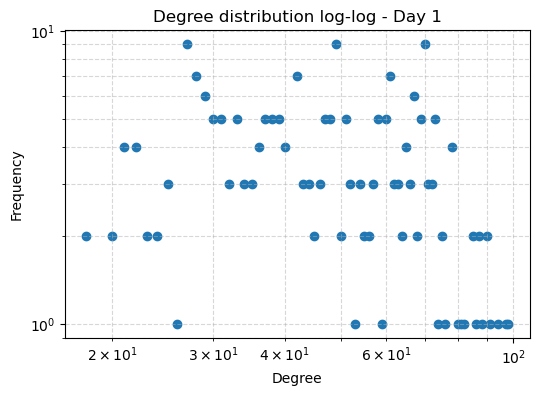

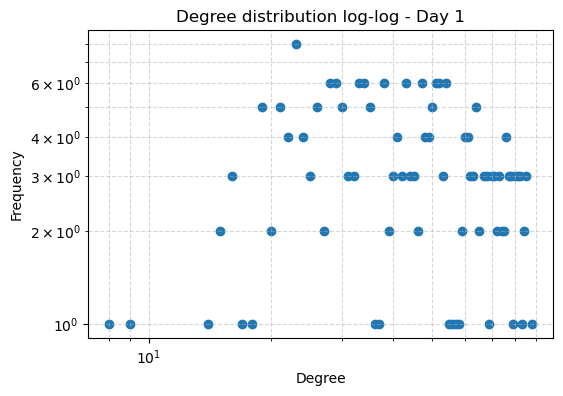

In [10]:
# Regardons si la distribution de degrés suit une Power Law (ce n'est pas le cas ici)

# Jour 1
degree_count = {}
for d in degrees1:
    degree_count[d] =degree_count.get(d,0)+1

x=np.array(list(degree_count.keys()))
y=np.array(list(degree_count.values()))

plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.xscale("log")
plt.yscale("log")
plt.title("Degree distribution log-log - Day 1")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True,which="both", linestyle='--',alpha= 0.5)
plt.show()

# Jour 2
degree_count = {}
for d in degrees2:
    degree_count[d] =degree_count.get(d,0)+1

x=np.array(list(degree_count.keys()))
y=np.array(list(degree_count.values()))

plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.xscale("log")
plt.yscale("log")
plt.title("Degree distribution log-log - Day 1")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True,which="both", linestyle='--',alpha= 0.5)
plt.show()

B. Distribution de degré pondérée


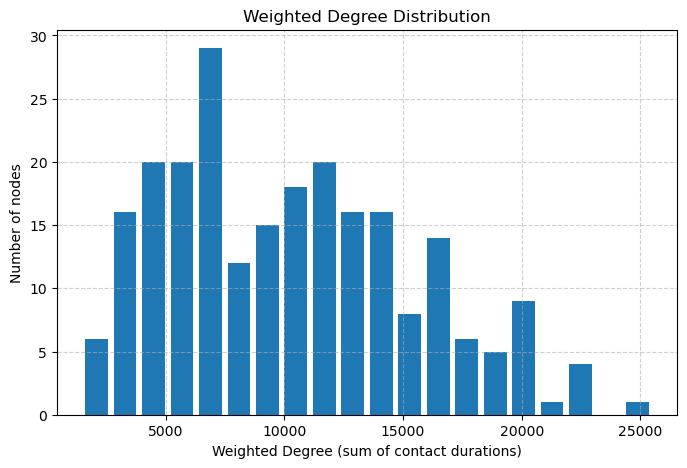

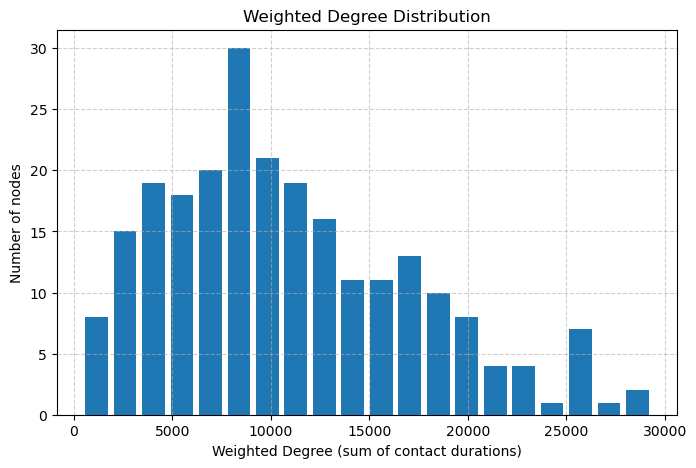

In [11]:
# Calcul du degré de distribution pondéré (somme des 'duration' pour chaque noeud) donc ici le temps total de contact d'un individu avec tous les autres.

#Jour 1

weighted_degrees1 = [d for n, d in G1.degree(weight="duration")]

plt.figure(figsize=(8, 5))
plt.hist(weighted_degrees1, bins=20, rwidth=0.8)

plt.title("Weighted Degree Distribution")
plt.xlabel("Weighted Degree (sum of contact durations)")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Jour 2

weighted_degrees2 = [d for n, d in G2.degree(weight="duration")]

plt.figure(figsize=(8, 5))
plt.hist(weighted_degrees2, bins=20, rwidth=0.8)

plt.title("Weighted Degree Distribution")
plt.xlabel("Weighted Degree (sum of contact durations)")
plt.ylabel("Number of nodes")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

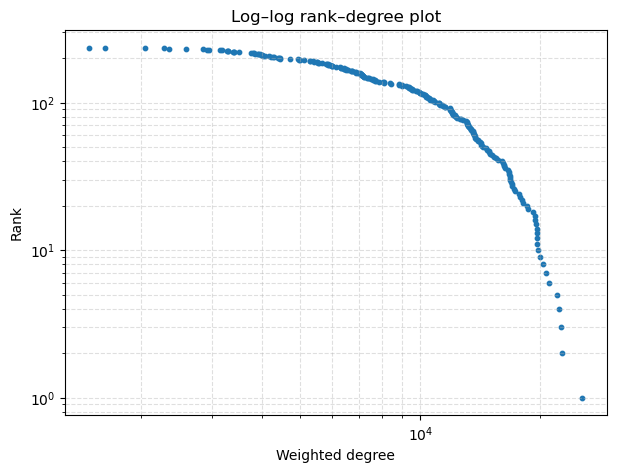

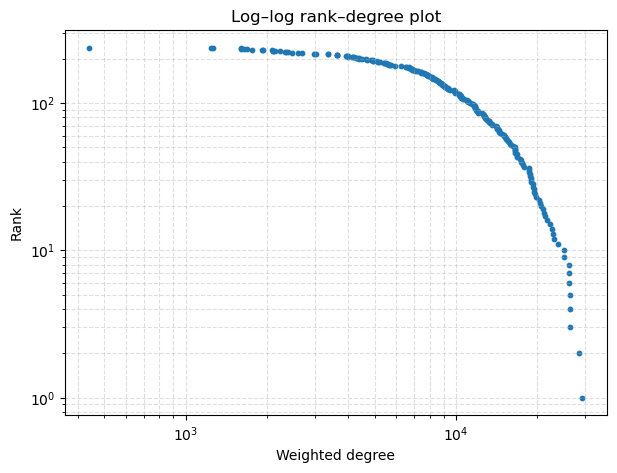

In [12]:
# Identification d'une power law pour les degrés pondérés? Pas de Power Law ici.

#Jour 1

weighted_degrees1_sorted = np.sort(weighted_degrees1)[::-1]
ranks = np.arange(1, len(weighted_degrees1_sorted) + 1)

plt.figure(figsize=(7,5))
plt.scatter(weighted_degrees1_sorted, ranks, s=10)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Weighted degree")
plt.ylabel("Rank")
plt.title("Log–log rank–degree plot")
plt.grid(True, which="both", linestyle='--', alpha=0.4)
plt.show()

#Jour 2

weighted_degrees2_sorted = np.sort(weighted_degrees2)[::-1]
ranks = np.arange(1, len(weighted_degrees2_sorted) + 1)

plt.figure(figsize=(7,5))
plt.scatter(weighted_degrees2_sorted, ranks, s=10)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Weighted degree")
plt.ylabel("Rank")
plt.title("Log–log rank–degree plot")
plt.grid(True, which="both", linestyle='--', alpha=0.4)
plt.show()

In [13]:
# Extraction des 10 noeuds les plus important 
cat = nx.get_node_attributes(G1, "classname")

df_deg = pd.DataFrame({
    "node": [n for n, d in G1.degree()],
    "degree": [d for n, d in G1.degree()],
    "weighted_degree": [d for n, d in G1.degree(weight="duration")],
    "classname": [cat[n] for n in G1.nodes()],
})

# sur base de leur degré
print(df_deg.sort_values("degree", ascending=False).head(10))

# sur base de leur degré pondéré
print(df_deg.sort_values("weighted_degree", ascending=False).head(10))


     node  degree  weighted_degree classname
23   1551      98            13700        3B
211  1761      97            13560        1A
1    1780      94            13380        3A
38   1700      91            19740        3B
49   1822      90            14960        3A
40   1552      90            19160        3B
175  1890      88            22520        2B
32   1560      87            16780        3B
86   1833      87            12240        3A
45   1708      86            16540        2B
     node  degree  weighted_degree classname
17   1695      67            25480        1B
51   1698      61            22680        1B
175  1890      88            22520        2B
27   1697      76            22240        1B
58   1920      53            21940        1B
202  1889      71            21040        2B
46   1558      69            20600        3B
201  1688      58            20320        1B
56   1663      36            20000        1B
38   1700      91            19740        3B


C. Coefficient de clustering

In [14]:
#  JOUR 1
# 
# clustering non pondéré moyen
avg_clust1 = nx.average_clustering(G1)
print("Average clustering (unweighted) :", avg_clust1)

# clustering pondéré moyen
avg_clust1_w = nx.average_clustering(G1, weight="duration")
print("Average clustering (weighted, weight='duration') :", avg_clust1_w)

# Local clustering coefficients (non pondéré)
clust_nodes1 = nx.clustering(G1) 


# Local clustering coefficients (pondéré)
clust_nodes1_w = nx.clustering(G1, weight="duration")

nx.set_node_attributes(G1, clust_nodes1, "clustering")
nx.set_node_attributes(G1, clust_nodes1_w, "clustering_w")

# Récupérer classname pour chaque noeud
cat1 = nx.get_node_attributes(G1, "classname")

# Construction dataframe
dfc1 = pd.DataFrame({
    "node": list(G1.nodes()),
    "classname": [cat1.get(n, "NA") for n in G1.nodes()],
    "clustering": [clust_nodes1[n] for n in G1.nodes()],
    "clustering_w": [clust_nodes1_w[n] for n in G1.nodes()]
})

# Moyennes par catégorie
by_cat1 = dfc1.groupby("classname").agg({
    "clustering": ["mean", "median", "count"],
    "clustering_w": ["mean", "median"]
})
print(by_cat1)

Average clustering (unweighted) : 0.5018529176737266
Average clustering (weighted, weight='duration') : 0.007854216893789383
          clustering                 clustering_w          
                mean    median count         mean    median
classname                                                  
1A          0.449932  0.421907    22     0.006363  0.005934
1B          0.559331  0.487245    25     0.013976  0.011815
2A          0.482786  0.455027    22     0.005752  0.005253
2B          0.551385  0.551920    25     0.008760  0.007543
3A          0.461838  0.432157    23     0.005456  0.005213
3B          0.441031  0.418039    21     0.006686  0.006878
4A          0.535217  0.471545    21     0.011352  0.008829
4B          0.465171  0.429825    22     0.005578  0.004971
5A          0.522065  0.506616    22     0.006961  0.006185
5B          0.536445  0.512545    23     0.006952  0.006585
Teachers    0.496867  0.481774    10     0.007862  0.005944


In [15]:
# JOUR 2
# 
# clustering non pondéré moyen
avg_clust2 = nx.average_clustering(G2)
print("Average clustering (unweighted) :", avg_clust2)

# clustering pondéré moyen
avg_clust2_w = nx.average_clustering(G2, weight="duration")
print("Average clustering (weighted, weight='duration') :", avg_clust2_w)

# Local clustering coefficients (non pondéré)
clust_nodes2 = nx.clustering(G2) 


# Local clustering coefficients (pondéré)
clust_nodes2_w = nx.clustering(G2, weight="duration")

nx.set_node_attributes(G2, clust_nodes2, "clustering")
nx.set_node_attributes(G2, clust_nodes2_w, "clustering_w")

# Récupérer classname pour chaque noeud
cat2 = nx.get_node_attributes(G2, "classname")

# Construction dataframe
dfc2 = pd.DataFrame({
    "node": list(G2.nodes()),
    "classname": [cat2.get(n, "NA") for n in G2.nodes()],
    "clustering": [clust_nodes2[n] for n in G2.nodes()],
    "clustering_w": [clust_nodes2_w[n] for n in G2.nodes()]
})

# Moyennes par catégorie
by_cat2 = dfc2.groupby("classname").agg({
    "clustering": ["mean", "median", "count"],
    "clustering_w": ["mean", "median"]
})
print(by_cat2)

Average clustering (unweighted) : 0.559558532849634
Average clustering (weighted, weight='duration') : 0.010547983810277462
          clustering                 clustering_w          
                mean    median count         mean    median
classname                                                  
1A          0.496788  0.452347    23     0.006868  0.006079
1B          0.461910  0.413165    25     0.011152  0.009112
2A          0.536808  0.503017    23     0.014663  0.012103
2B          0.641347  0.593909    26     0.013039  0.011712
3A          0.559206  0.526776    23     0.009765  0.009238
3B          0.547581  0.532656    21     0.011995  0.010486
4A          0.565185  0.471264    21     0.008150  0.007421
4B          0.624955  0.650753    22     0.007096  0.006660
5A          0.522142  0.495510    21     0.011113  0.009649
5B          0.636142  0.502674    23     0.010782  0.008488
Teachers    0.560434  0.485586    10     0.011227  0.011401


D. Mesures de centralité

In [16]:
# --- Centralités pondérées ---

# Jour 1
degree1 = dict(G1.degree(weight="duration"))

betw1 = nx.betweenness_centrality(G1, weight="duration", normalized=True)

# closeness → distance = 1 / poids
#  pour que "plus de contact = distance plus courte", on inverse)
G1_for_closeness = G1.copy()
for u, v, d in G1_for_closeness.edges(data=True):
    d["inv_duration"] = 1 / d["duration"]

close1 = nx.closeness_centrality(G1_for_closeness, distance="inv_duration")

pagerank1 = nx.pagerank(G1, weight="duration")

katz_centrality = nx.katz_centrality( G1,alpha=0.01, beta=1.0, max_iter=1000, tol=1.0e-6, nstart=None, normalized=True, weight=None)

df1_cent = pd.DataFrame({
    "node": list(G1.nodes()),
    "classname": [G1.nodes[n]["classname"] for n in G1.nodes()],
    "degree": [degree1[n] for n in G1.nodes()],
    "betweenness": [betw1[n] for n in G1.nodes()],
    "closeness": [close1[n] for n in G1.nodes()],
    "pagerank": [pagerank1[n] for n in G1.nodes()],
    "katz_centrality":[katz_centrality[n] for n in G1.nodes()]
})

df1_cent.head()






node classname  degree  betweenness   closeness  pagerank  katz_centrality
0  1789        1A    5900     0.005414  173.847865  0.002716         0.061141
1  1780        3A   13380     0.013200  233.535643  0.005533         0.097007
2  1782        3A    5300     0.007497  178.861499  0.002671         0.058135
3  1783        1A    8060     0.004084  197.509086  0.003468         0.063642
4  1787        1A   15980     0.017755  204.749243  0.005857         0.080840

In [17]:

# Jour 2
degree2 = dict(G2.degree(weight="duration"))

betw2 = nx.betweenness_centrality(G2, weight="duration", normalized=True)

# closeness → distance = 1 / poids
#  pour que "plus de contact = distance plus courte", on inverse)
G2_for_closeness = G2.copy()
for u, v, d in G2_for_closeness.edges(data=True):
    d["inv_duration"] = 1 / d["duration"]

close2 = nx.closeness_centrality(G2_for_closeness, distance="inv_duration")

pagerank2 = nx.pagerank(G2, weight="duration")

katz_centrality = nx.katz_centrality( G2,alpha=0.01, beta=1.0, max_iter=1000, tol=1.0e-6, nstart=None, normalized=True, weight=None)

df2_cent = pd.DataFrame({
    "node": list(G2.nodes()),
    "classname": [G2.nodes[n]["classname"] for n in G2.nodes()],
    "degree": [degree2[n] for n in G2.nodes()],
    "betweenness": [betw2[n] for n in G2.nodes()],
    "closeness": [close2[n] for n in G2.nodes()],
    "pagerank": [pagerank2[n] for n in G2.nodes()],
    "katz_centrality":[katz_centrality[n] for n in G2.nodes()]
})

df2_cent.head()

node classname  degree  betweenness   closeness  pagerank  katz_centrality
0  1789        1A    7900     0.008573  178.388960  0.003781         0.066501
1  1780        3A   17300     0.007664  214.690491  0.005789         0.087474
2  1782        3A   12840     0.004487  184.560484  0.004424         0.073898
3  1783        1A    8140     0.011938  177.887790  0.004111         0.062453
4  1787        1A    4680     0.001677  161.335204  0.002630         0.050979

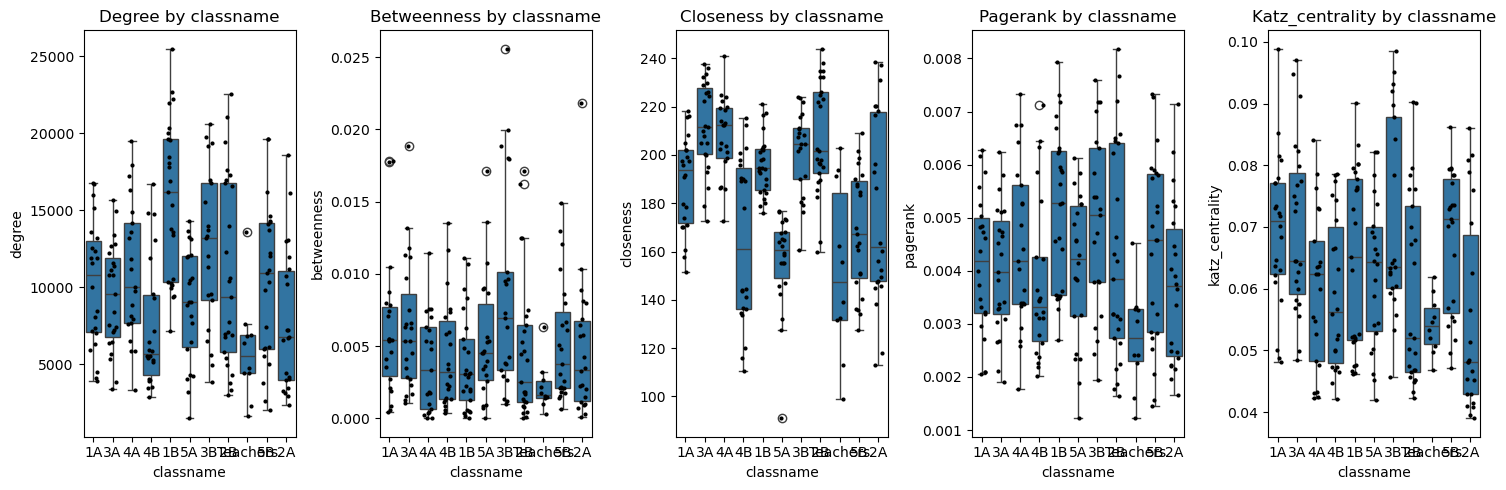

In [18]:
# JOUR 1

import seaborn as sns

centralities = ["degree", "betweenness", "closeness", "pagerank", "katz_centrality"]

plt.figure(figsize=(15, 5))
for i, c in enumerate(centralities, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df1_cent, x="classname", y=c)
    sns.stripplot(data=df1_cent, x="classname", y=c, color="black", size=3, jitter=0.2)
    plt.title(f"{c.capitalize()} by classname")
plt.tight_layout()
plt.show()

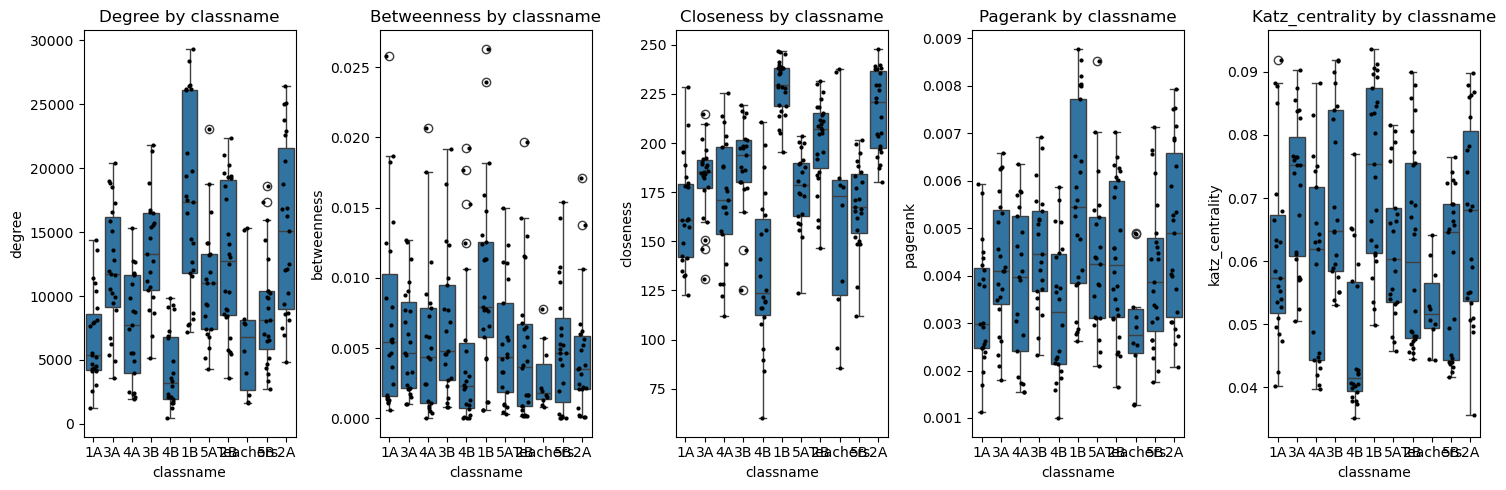

In [19]:
 # JOUR 2


centralities2 = ["degree", "betweenness", "closeness", "pagerank", "katz_centrality"]

plt.figure(figsize=(15, 5))
for i, c in enumerate(centralities2, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df2_cent, x="classname", y=c)
    sns.stripplot(data=df2_cent, x="classname", y=c, color="black", size=3, jitter=0.2)
    plt.title(f"{c.capitalize()} by classname")
plt.tight_layout()
plt.show()

### Modèle de réseau


=== Comparaison avec modèle Erdős–Rényi ===


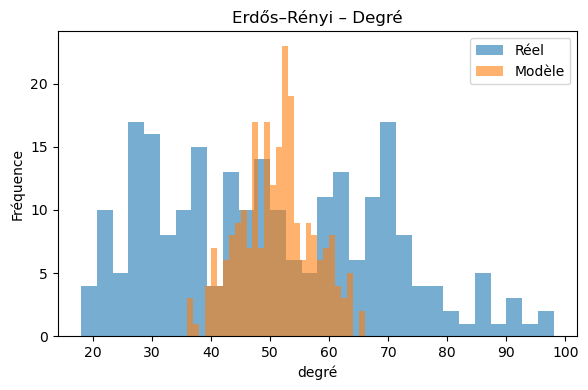

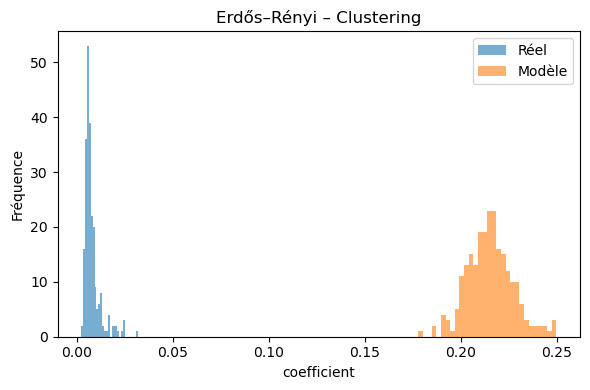

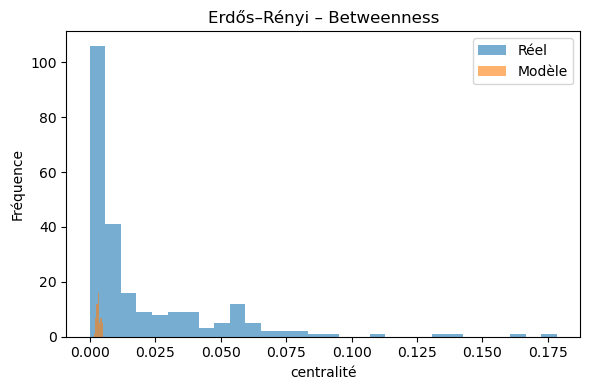

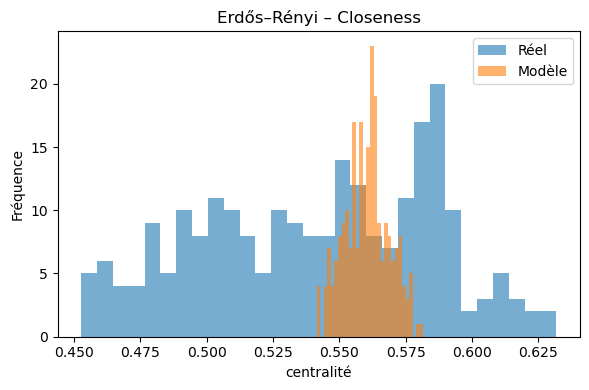


=== Comparaison avec modèle Configuration Model ===


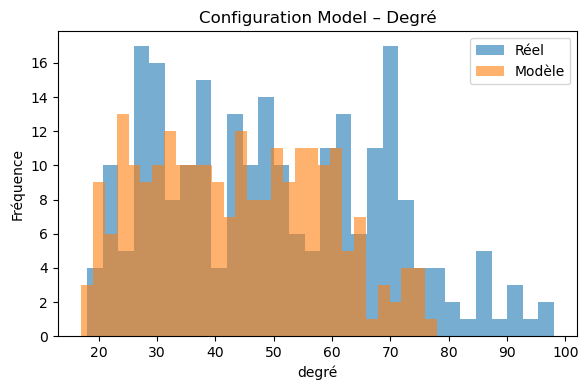

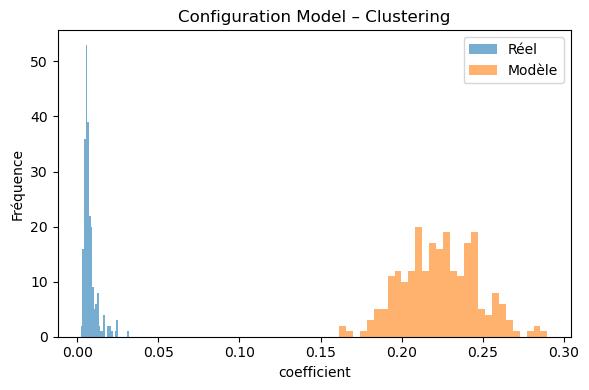

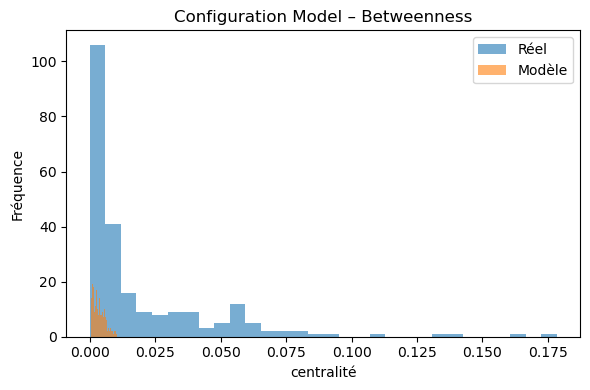

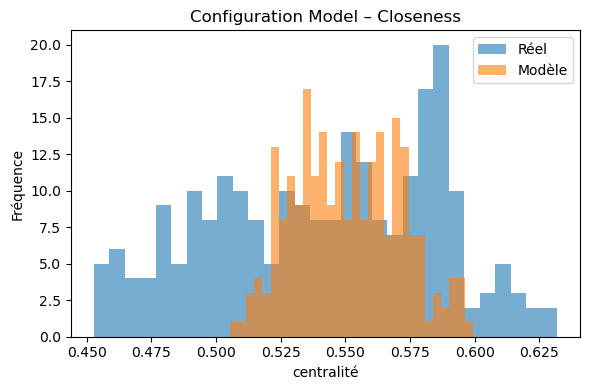


=== Comparaison avec modèle Barabási–Albert ===


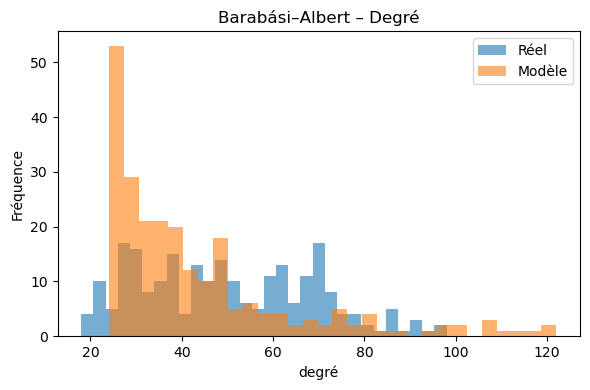

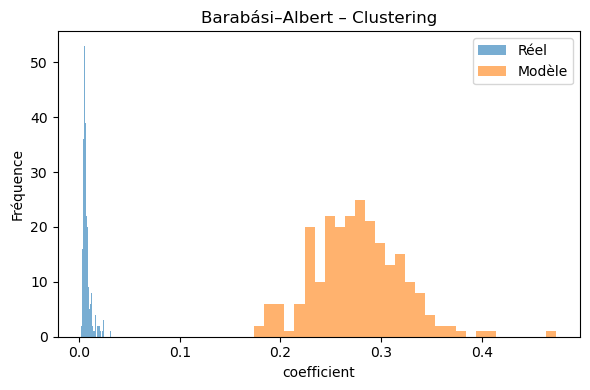

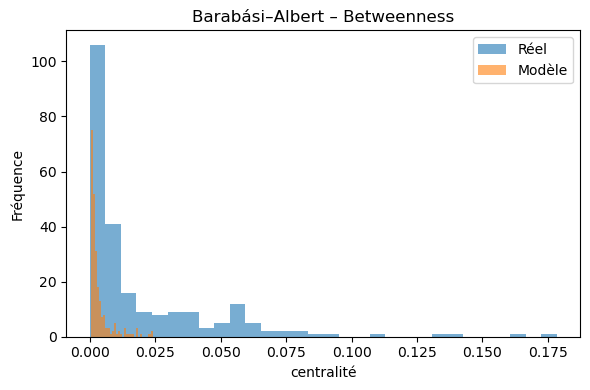

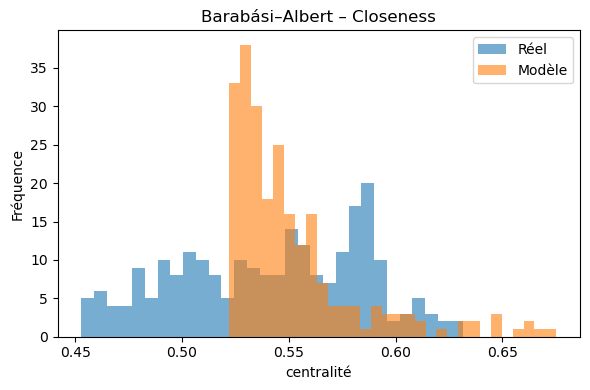

In [20]:
# -------------------------------------------------------------------
# Helper: plotting distributions
# -------------------------------------------------------------------
def plot_distribution(data_real, data_model, title, xlabel):
    plt.figure(figsize=(6,4))
    plt.hist(data_real, bins=30, alpha=0.6, label='Réel')
    plt.hist(data_model, bins=30, alpha=0.6, label='Modèle')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Fréquence")
    plt.legend()
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------------------
# Helper: compute metrics for a graph
# -------------------------------------------------------------------
def compute_metrics(G1):
    metrics = {}

    # Degree

    metrics["degree"] = [d for _, d in G1.degree()]

    # Weighted degree (sum of weights)
    if nx.get_edge_attributes(G1, "duration"):
        metrics["weighted_degree"] = [sum(d["duration"] for _, _, d in G1.edges(n, data=True)) for n in G1.nodes()]
    else:
        metrics["weighted_degree"] = None

    # Clustering
    metrics["clustering"] = list(nx.clustering(G1, weight="duration").values())

    # Betweenness
    metrics["betweenness"] = list(nx.betweenness_centrality(G1, weight="inv_duration").values()) \
        if nx.get_edge_attributes(G1, "inv_duration") else list(nx.betweenness_centrality(G1).values())

    # Closeness
    metrics["closeness"] = list(nx.closeness_centrality(G1, distance="inv_duration").values()) \
        if nx.get_edge_attributes(G1, "inv_t") else list(nx.closeness_centrality(G1).values())

    # PageRank
    metrics["pagerank"] = list(nx.pagerank(G1, weight="duration").values()) \
        if nx.get_edge_attributes(G1, "duration") else list(nx.pagerank(G1).values())

    # Edge weights
    metrics["weights"] = [d["duration"] for _,_,d in G1.edges(data=True)] \
        if nx.get_edge_attributes(G1, "duration") else None

    return metrics
# Ajoute des distances inverses pour pondérer les centralités
for u,v,d in G1.edges(data=True):
    if d["duration"] > 0:
        d["inv_duration"] = 1/d["duration"]
    else:
        d["inv_duration"] = 0.000001

metrics_real = compute_metrics(G1)

# -------------------------------------------------------------------
# 2. Generate comparable random models
# -------------------------------------------------------------------
n = G1.number_of_nodes()
m = G1.number_of_edges()

# --- Erdős–Rényi ---
p = (2*m) / (n*(n-1))
G1_er = nx.erdos_renyi_graph(n, p)

# --- Configuration model (preserves degree sequence) ---
degree_seq = [d for _, d in G1.degree()]
G1_cfg_multi = nx.configuration_model(degree_seq)
G1_cfg = nx.Graph(G1_cfg_multi)   # remove parallel edges
G1_cfg.remove_edges_from(nx.selfloop_edges(G1_cfg))

# --- Preferential attachment (Barabási–Albert) ---
avg_degree = int(np.mean(degree_seq)//2) 
avg_degree = max(1, avg_degree)
G1_ba = nx.barabasi_albert_graph(n, avg_degree)

# -------------------------------------------------------------------
# 3. Compute metrics for all models
# -------------------------------------------------------------------
metrics_er  = compute_metrics(G1_er)
metrics_cfg = compute_metrics(G1_cfg)
metrics_ba  = compute_metrics(G1_ba)

# -------------------------------------------------------------------
# 4. Plot comparisons
# -------------------------------------------------------------------
def compare_model(metrics_real, metrics_model, model_name):
    print(f"\n=== Comparaison avec modèle {model_name} ===")

    plot_distribution(metrics_real["degree"], metrics_model["degree"],
                      f"{model_name} – Degré", "degré")

    if metrics_real["clustering"] and metrics_model["clustering"]:
        plot_distribution(metrics_real["clustering"], metrics_model["clustering"],
                          f"{model_name} – Clustering", "coefficient")

    plot_distribution(metrics_real["betweenness"], metrics_model["betweenness"],
                      f"{model_name} – Betweenness", "centralité")

    plot_distribution(metrics_real["closeness"], metrics_model["closeness"],
                      f"{model_name} – Closeness", "centralité")

    if metrics_real["weights"] and metrics_model["weights"]:
        plot_distribution(metrics_real["weights"], metrics_model["weights"],
                          f"{model_name} – Distribution des poids", "poids")
        

# -------------------------------------------------------------------
# 5. RUN ALL COMPARISONS
# -------------------------------------------------------------------
compare_model(metrics_real, metrics_er,  "Erdős–Rényi")
compare_model(metrics_real, metrics_cfg, "Configuration Model")
compare_model(metrics_real, metrics_ba,  "Barabási–Albert")


 ### Détection de communautés
 

Modularity: 0.3758
Number of communities: 6
Community sizes (id : size):
  0 : 23
  1 : 46
  5 : 69
  3 : 23
  2 : 52
  4 : 23

Composition des communautés :
classname  1A  1B  2A  2B  3A  3B  4A  4B  5A  5B  Teachers  size
community                                                        
5           0   0   0   0   0   0  21   0  22  23         3    69
2           0  25   0  25   0   0   0   0   0   0         2    52
1           0   0   0   0  23  21   0   0   0   0         2    46
0          22   0   0   0   0   0   0   0   0   0         1    23
3           0   0   0   0   0   0   0  22   0   0         1    23
4           0   0  22   0   0   0   0   0   0   0         1    23


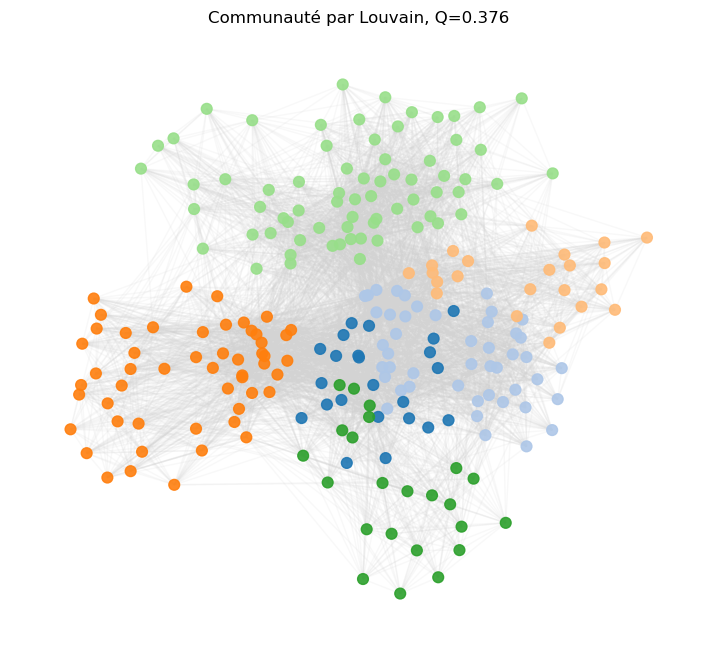

In [21]:
# JOUR 1

!pip install python-louvain

import community as community_louvain

# ---------------------------
# 1) Partition Louvain
# ---------------------------

partition1 = community_louvain.best_partition(G1)
nx.set_node_attributes(G1, partition1, "community")

# ---------------------------
# 2) Modularity & community sizes
# ---------------------------

modularity = community_louvain.modularity(partition1, G1)

from collections import Counter
comm_counts = Counter(partition1.values())
n_comms = len(comm_counts)

print(f"Modularity: {modularity:.4f}")
print(f"Number of communities: {n_comms}")
print("Community sizes (id : size):")
for cid, size in comm_counts.items():
    print(f"  {cid} : {size}")

# ---------------------------
# 3) Composition par catégorie
# ---------------------------

df_nodes = pd.DataFrame({
    "node": list(G1.nodes()),
    "classname": [G1.nodes[n]['classname'] for n in G1.nodes()],
    "community": [partition1[n] for n in G1.nodes()]
})

comp_table = pd.crosstab(df_nodes["community"], df_nodes["classname"])
comp_table["size"] = comp_table.sum(axis=1)
comp_table = comp_table.sort_values("size", ascending=False)

print("\nComposition des communautés :")
print(comp_table)

# ---------------------------
# 4) Affichage du graphe coloré par communauté
# ---------------------------

pos = nx.spring_layout(G1, seed=42)

# palette
import matplotlib.cm as cm
palette = [cm.tab20(i) for i in range(20)]
colors = [palette[partition1[n] % 20] for n in G1.nodes()]

plt.figure(figsize=(9, 8))
nx.draw_networkx_nodes(G1, pos, node_color=colors, node_size=60, alpha=0.9)
nx.draw_networkx_edges(G1, pos, edge_color="lightgray", alpha=0.15)
plt.axis("off")
plt.title(f"Communauté par Louvain, Q={modularity:.3f}")
plt.savefig('./figures/School_Day1_communities_louvain.png')
plt.show()


Modularity: 0.3963
Number of communities: 6
Community sizes (id : size):
  0 : 24
  1 : 46
  4 : 48
  2 : 23
  5 : 46
  3 : 51

Composition des communautés :
classname  1A  1B  2A  2B  3A  3B  4A  4B  5A  5B  Teachers  size
community                                                        
3           0   0  23  26   0   0   0   0   0   0         2    51
4           0  25   0   0   0   0  21   0   0   0         2    48
1           0   0   0   0  23  21   0   0   0   0         2    46
5           0   0   0   0   0   0   0   0  21  23         2    46
0          23   0   0   0   0   0   0   0   0   0         1    24
2           0   0   0   0   0   0   0  22   0   0         1    23


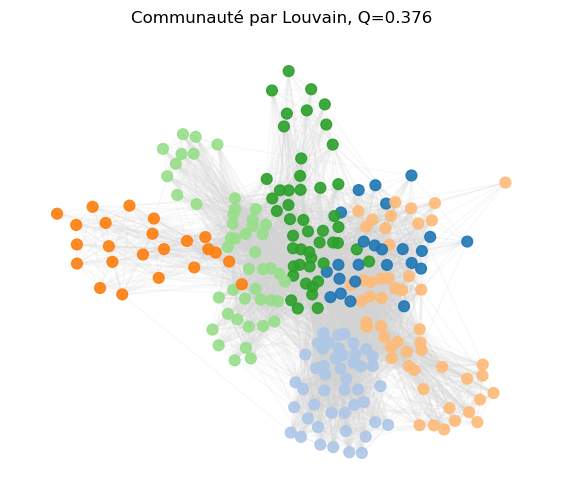

In [22]:
# JOUR 2

# ---------------------------
# 1) Partition Louvain
# ---------------------------

partition2 = community_louvain.best_partition(G2)
nx.set_node_attributes(G2, partition2, "community")

# ---------------------------
# 2) Modularity & community sizes
# ---------------------------

modularity2 = community_louvain.modularity(partition2, G2)

from collections import Counter
comm_counts = Counter(partition2.values())
n_comms = len(comm_counts)

print(f"Modularity: {modularity2:.4f}")
print(f"Number of communities: {n_comms}")
print("Community sizes (id : size):")
for cid, size in comm_counts.items():
    print(f"  {cid} : {size}")

# ---------------------------
# 3) Composition par catégorie
# ---------------------------

df_nodes = pd.DataFrame({
    "node": list(G2.nodes()),
    "classname": [G2.nodes[n]['classname'] for n in G2.nodes()],
    "community": [partition2[n] for n in G2.nodes()]
})

comp_table = pd.crosstab(df_nodes["community"], df_nodes["classname"])
comp_table["size"] = comp_table.sum(axis=1)
comp_table = comp_table.sort_values("size", ascending=False)

print("\nComposition des communautés :")
print(comp_table)

# ---------------------------
# 4) Affichage du graphe coloré par communauté
# ---------------------------

pos = nx.spring_layout(G2, seed=42)

# palette
import matplotlib.cm as cm
palette = [cm.tab20(i) for i in range(20)]
colors = [palette[partition2[n] % 20] for n in G2.nodes()]

plt.figure(figsize=(7, 6))
nx.draw_networkx_nodes(G2, pos, node_color=colors, node_size=60, alpha=0.9)
nx.draw_networkx_edges(G2, pos, edge_color="lightgray", alpha=0.15)
plt.axis("off")
plt.title(f"Communauté par Louvain, Q={modularity:.3f}")
plt.savefig('./figures/School_Day2_communities_louvain.png')
plt.show()


# Dynamique


In [23]:
def simulate_dynamics(G1, steps, tolerance=1e-5):
    history_mean = []
    history_var = []
    history_states = []  # liste des états individuels
    
    for t in range(steps):
        states = np.array([G1.nodes[n]['state'] for n in G1.nodes])
        
        history_mean.append(np.mean(states))
        history_var.append(np.var(states))
        history_states.append(states.copy())
        
        # Mise à jour synchrone
        next_states = {}
        for node in G1.nodes:
            neighbors = list(G1.neighbors(node))
            if neighbors:
                neighbor_states = [G1.nodes[n]['state'] for n in neighbors]
                next_states[node] = np.mean(neighbor_states)
            else:
                next_states[node] = G1.nodes[node]['state']

        for node in G1.nodes:
            G1.nodes[node]['state'] = next_states[node]

        if np.var([G1.nodes[n]['state'] for n in G1.nodes]) < tolerance:
            print(f"Convergence atteinte au pas t={t}")
            break

    return history_mean, history_var, history_states



import random

# Initialise un état aléatoire entre 0 et 1 pour chaque nœud
for n in G1.nodes:
    G1.nodes[n]["state"] = random.random()


history_mean, history_var, history_states = simulate_dynamics(G1, 50)


Convergence atteinte au pas t=4


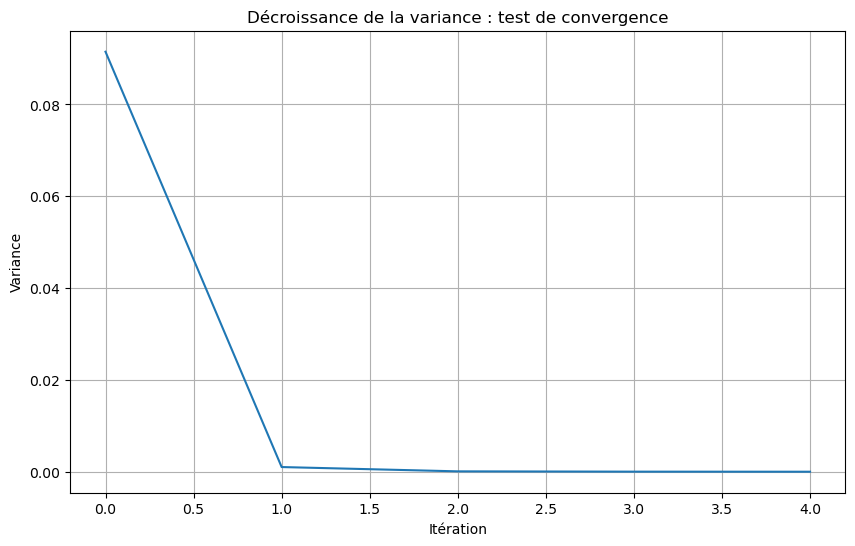

In [24]:
plt.figure(figsize=(10,6))
plt.plot(history_var)
plt.title("Décroissance de la variance : test de convergence")
plt.xlabel("Itération")
plt.ylabel("Variance")
plt.grid(True)
plt.show()


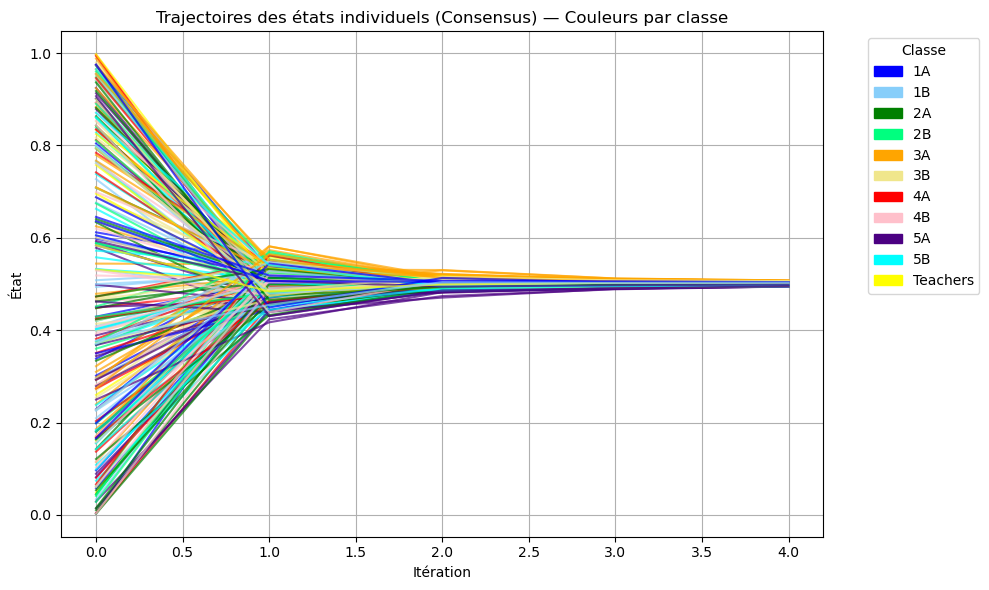

In [25]:
import matplotlib.pyplot as plt

# Récupération des classes des noeuds
node_classes = nx.get_node_attributes(G1, "classname")

# Même ordre de nœuds que dans l’historique
nodes_order = list(G1.nodes())

# Préparation des couleurs pour chaque nœud
node_colors = [color_map.get(node_classes[n], "gray") for n in nodes_order]

plt.figure(figsize=(10,6))

# Tracer les trajectoires avec la couleur correspondant à la classe
for i, node in enumerate(nodes_order):
    trajectory = [state_vector[i] for state_vector in history_states]
    plt.plot(trajectory, color=node_colors[i], alpha=0.7)

# Légende : une entrée par classe
from matplotlib.patches import Patch
legend_handles = [
    Patch(color=c, label=cls) for cls, c in color_map.items()
]

plt.legend(handles=legend_handles, title="Classe", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Trajectoires des états individuels (Consensus) — Couleurs par classe")
plt.xlabel("Itération")
plt.ylabel("État")
plt.grid(True)
plt.tight_layout()
plt.show()



# Même principe: dynamique de consensus mais cette fois pondérée par les durées des contacts. Pas certaine que ce soit pertinent... qu'en pensez-vous?

In [26]:
def simulate_weighted_dynamics(G1, steps, tolerance=1e-5):
    history_mean = []
    history_var = []
    history_states = []

    nodes_order = list(G1.nodes())

    for t in range(steps):
        states = np.array([G1.nodes[n]['state'] for n in nodes_order])

        history_mean.append(np.mean(states))
        history_var.append(np.var(states))
        history_states.append(states.copy())

        next_states = {}

        for node in nodes_order:
            neighbors = list(G1.neighbors(node))

            if neighbors:
                weights = np.array([G1[node][nbr].get("duration", 1.0) 
                                    for nbr in neighbors])
                neighbor_states = np.array([G1.nodes[nbr]['state'] 
                                            for nbr in neighbors])

                # moyenne pondérée
                next_states[node] = np.average(neighbor_states, weights=weights)

            else:
                next_states[node] = G1.nodes[node]['state']

        # mise à jour
        for node in nodes_order:
            G1.nodes[node]['state'] = next_states[node]

        # test convergence
        new_states = np.array([G1.nodes[n]['state'] for n in nodes_order])
        if np.var(new_states) < tolerance:
            print(f"Convergence atteinte au pas t={t}")
            break

    return history_mean, history_var, history_states, nodes_order


In [27]:
# Initialisation des états (ex: uniforme aléatoire)
for n in G1.nodes:
    G1.nodes[n]["state"] = np.random.random()

history_mean_w, history_var_w, history_states_w, nodes_order = simulate_weighted_dynamics(G1, 50)


Convergence atteinte au pas t=31


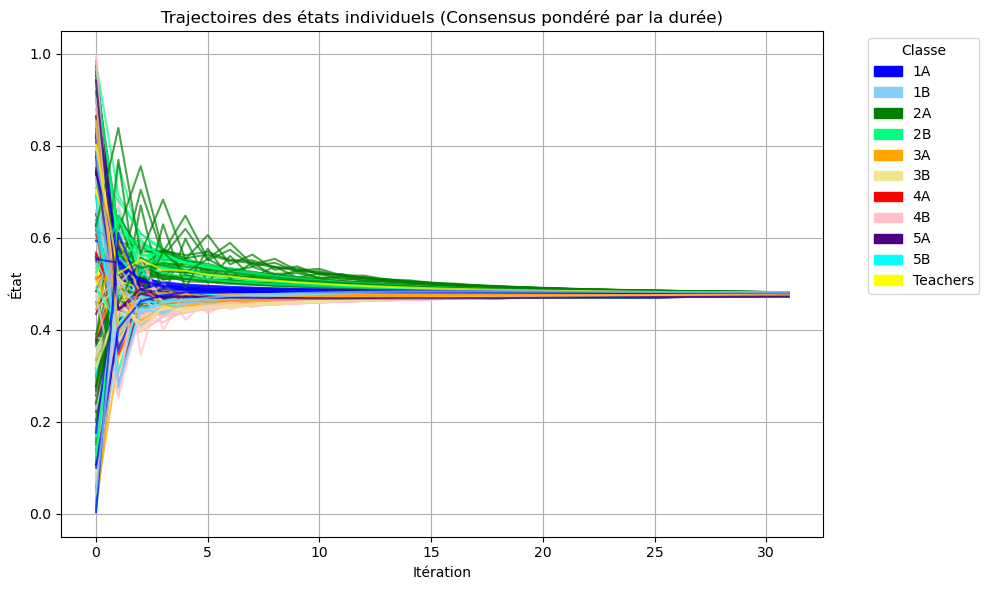

In [28]:
# Couleur par classe
node_classes = nx.get_node_attributes(G1, "classname")
node_colors = [color_map.get(node_classes[n], "gray") for n in nodes_order]

plt.figure(figsize=(10,6))

for i, node in enumerate(nodes_order):
    trajectory = [state_vector[i] for state_vector in history_states_w]
    plt.plot(trajectory, color=node_colors[i], alpha=0.7)

# Légende
from matplotlib.patches import Patch
legend_handles = [Patch(color=c, label=cls) for cls, c in color_map.items()]

plt.legend(handles=legend_handles, title="Classe", bbox_to_anchor=(1.05,1), loc='upper left')

plt.title("Trajectoires des états individuels (Consensus pondéré par la durée)")
plt.xlabel("Itération")
plt.ylabel("État")
plt.grid(True)
plt.tight_layout()
plt.show()


# Random Walk

In [29]:
import random
from collections import Counter
import math

# ----------------------------
# Marche aléatoire pondérée
# ----------------------------
def weighted_random_walk(G1, start_node, walk_length, weight='duration'):
    """
    Marche aléatoire pondérée sur G, avec tirage proportionnel au poids 'duration'.
    """
    if start_node not in G1:
        raise ValueError("Le nœud de départ n'existe pas dans le graphe.")

    walk = [start_node]
    current = start_node

    for _ in range(walk_length):
        neighbors = list(G1.neighbors(current))
        if not neighbors:
            break

        weights = [G1[current][nbr].get(weight, 1.0) for nbr in neighbors]
        current = random.choices(neighbors, weights=weights, k=1)[0]
        walk.append(current)

    return walk



In [30]:
# ----------------------------
# Histogramme et probas
# ----------------------------
def visit_histogram(walk):
    counts = Counter(walk)
    total = len(walk)
    probs = {node: c / total for node, c in counts.items()}
    return counts, probs


def walk_entropy(walk):
    _, probs = visit_histogram(walk)
    return -sum(p * math.log(p) for p in probs.values())


# ----------------------------
# Plot simple d’une distribution
# ----------------------------
def plot_distribution(probs, title):
    nodes = list(probs.keys())
    values = list(probs.values())

    plt.figure(figsize=(10,4))
    plt.bar(nodes, values)
    plt.title(title)
    plt.xlabel("Nœuds")
    plt.ylabel("Probabilité")
    plt.tight_layout()
    plt.show()




=== Simulation depuis le nœud 1789 ===
Distribution à t=15 pour start=1789 :
 {'1789': 0.13333333333333333, '1792': 0.13333333333333333, '1757': 0.06666666666666667, '1760': 0.06666666666666667, '1759': 0.06666666666666667, '1774': 0.06666666666666667, '1778': 0.06666666666666667, '1790': 0.06666666666666667, '1767': 0.06666666666666667, '1916': 0.06666666666666667, '1919': 0.06666666666666667, '1907': 0.06666666666666667, '1922': 0.06666666666666667}


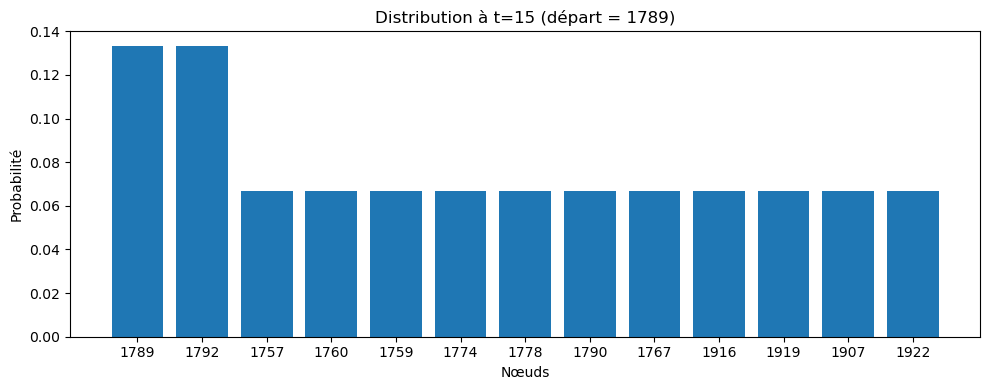

Distribution à t=45 pour start=1789 :
 {'1789': 0.044444444444444446, '1792': 0.044444444444444446, '1757': 0.022222222222222223, '1760': 0.022222222222222223, '1759': 0.022222222222222223, '1774': 0.022222222222222223, '1778': 0.022222222222222223, '1790': 0.022222222222222223, '1767': 0.022222222222222223, '1916': 0.044444444444444446, '1919': 0.022222222222222223, '1907': 0.022222222222222223, '1922': 0.022222222222222223, '1855': 0.022222222222222223, '1854': 0.022222222222222223, '1889': 0.044444444444444446, '1732': 0.044444444444444446, '1861': 0.022222222222222223, '1625': 0.022222222222222223, '1911': 0.022222222222222223, '1628': 0.022222222222222223, '1613': 0.022222222222222223, '1838': 0.022222222222222223, '1909': 0.022222222222222223, '1714': 0.022222222222222223, '1735': 0.022222222222222223, '1748': 0.022222222222222223, '1720': 0.022222222222222223, '1702': 0.022222222222222223, '1743': 0.022222222222222223, '1674': 0.022222222222222223, '1684': 0.022222222222222223, 

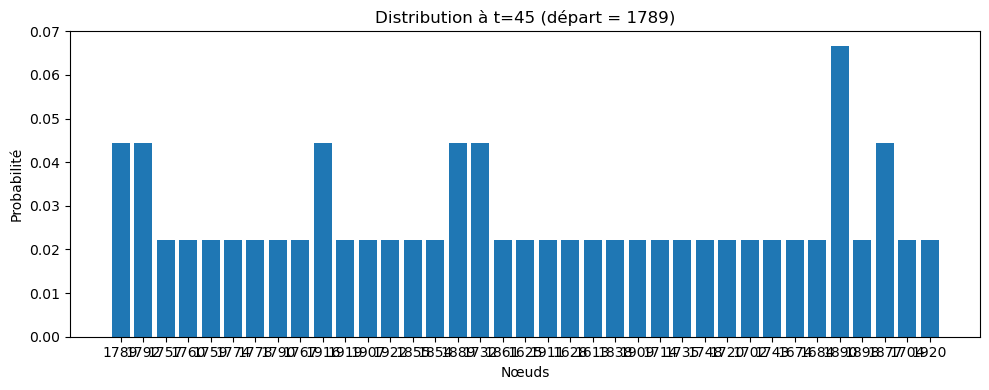

Distribution à t=90 pour start=1789 :
 {'1789': 0.022222222222222223, '1792': 0.022222222222222223, '1757': 0.011111111111111112, '1760': 0.011111111111111112, '1759': 0.011111111111111112, '1774': 0.011111111111111112, '1778': 0.011111111111111112, '1790': 0.011111111111111112, '1767': 0.011111111111111112, '1916': 0.022222222222222223, '1919': 0.011111111111111112, '1907': 0.011111111111111112, '1922': 0.011111111111111112, '1855': 0.011111111111111112, '1854': 0.011111111111111112, '1889': 0.022222222222222223, '1732': 0.022222222222222223, '1861': 0.011111111111111112, '1625': 0.011111111111111112, '1911': 0.011111111111111112, '1628': 0.011111111111111112, '1613': 0.011111111111111112, '1838': 0.011111111111111112, '1909': 0.011111111111111112, '1714': 0.011111111111111112, '1735': 0.011111111111111112, '1748': 0.011111111111111112, '1720': 0.011111111111111112, '1702': 0.011111111111111112, '1743': 0.011111111111111112, '1674': 0.03333333333333333, '1684': 0.011111111111111112, '

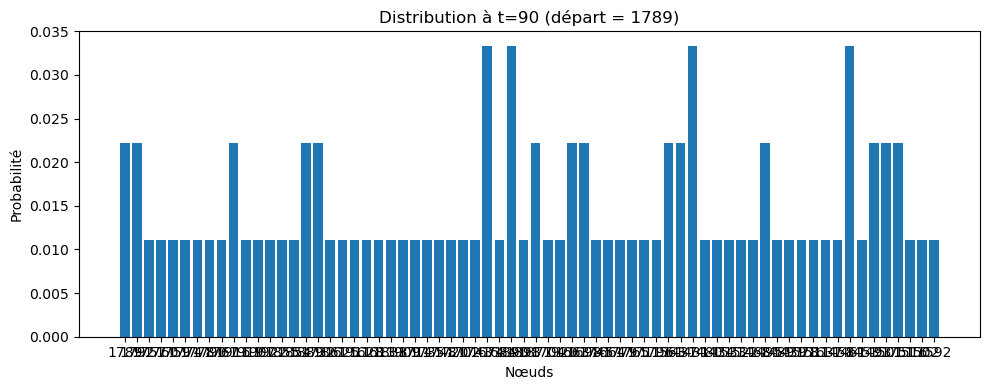

Distribution à t=600 pour start=1789 :
 {'1789': 0.006666666666666667, '1792': 0.008333333333333333, '1757': 0.011666666666666667, '1760': 0.0033333333333333335, '1759': 0.005, '1774': 0.008333333333333333, '1778': 0.0033333333333333335, '1790': 0.0016666666666666668, '1767': 0.01, '1916': 0.013333333333333334, '1919': 0.0033333333333333335, '1907': 0.0033333333333333335, '1922': 0.005, '1855': 0.006666666666666667, '1854': 0.0033333333333333335, '1889': 0.006666666666666667, '1732': 0.006666666666666667, '1861': 0.006666666666666667, '1625': 0.0033333333333333335, '1911': 0.0016666666666666668, '1628': 0.008333333333333333, '1613': 0.011666666666666667, '1838': 0.0016666666666666668, '1909': 0.008333333333333333, '1714': 0.005, '1735': 0.0033333333333333335, '1748': 0.005, '1720': 0.006666666666666667, '1702': 0.006666666666666667, '1743': 0.005, '1674': 0.013333333333333334, '1684': 0.01, '1890': 0.011666666666666667, '1898': 0.0016666666666666668, '1877': 0.005, '1704': 0.0116666666

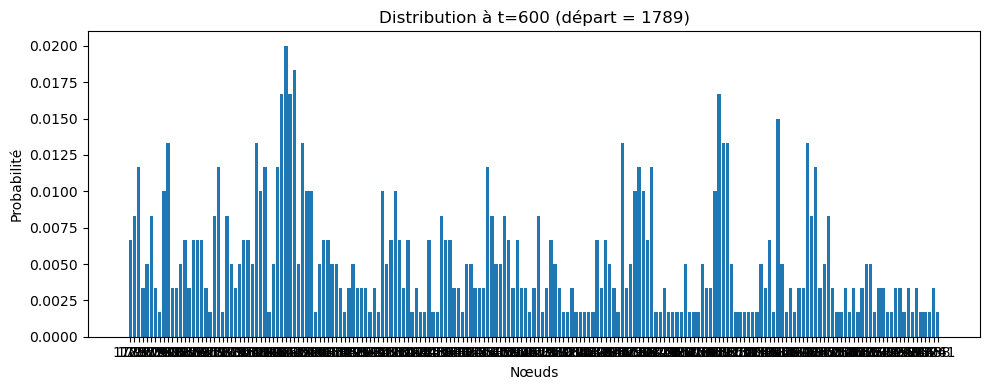


=== Simulation depuis le nœud 1824 ===
Distribution à t=15 pour start=1824 :
 {'1824': 0.13333333333333333, '1452': 0.06666666666666667, '1578': 0.06666666666666667, '1475': 0.06666666666666667, '1434': 0.06666666666666667, '1885': 0.06666666666666667, '1521': 0.06666666666666667, '1746': 0.13333333333333333, '1709': 0.06666666666666667, '1801': 0.06666666666666667, '1859': 0.06666666666666667, '1800': 0.06666666666666667, '1795': 0.06666666666666667}


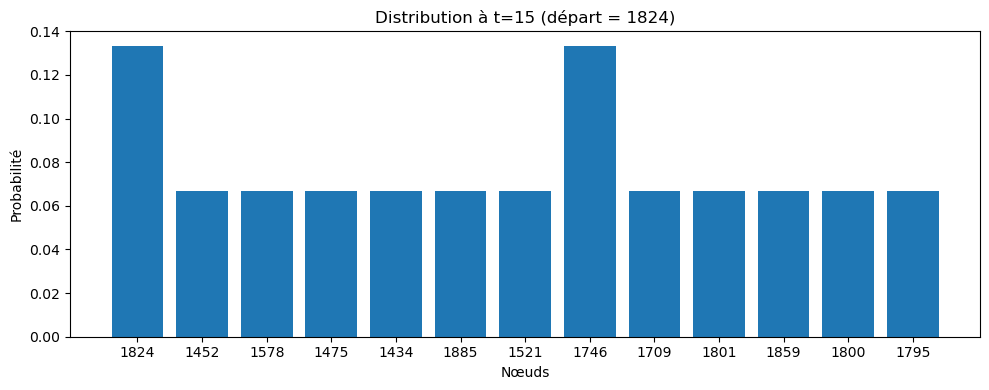

Distribution à t=45 pour start=1824 :
 {'1824': 0.044444444444444446, '1452': 0.044444444444444446, '1578': 0.044444444444444446, '1475': 0.044444444444444446, '1434': 0.022222222222222223, '1885': 0.022222222222222223, '1521': 0.022222222222222223, '1746': 0.044444444444444446, '1709': 0.022222222222222223, '1801': 0.022222222222222223, '1859': 0.022222222222222223, '1800': 0.022222222222222223, '1795': 0.044444444444444446, '1916': 0.022222222222222223, '1613': 0.044444444444444446, '1628': 0.044444444444444446, '1822': 0.022222222222222223, '1722': 0.022222222222222223, '1495': 0.022222222222222223, '1751': 0.022222222222222223, '1477': 0.044444444444444446, '1522': 0.022222222222222223, '1498': 0.022222222222222223, '1426': 0.022222222222222223, '1429': 0.044444444444444446, '1427': 0.044444444444444446, '1431': 0.044444444444444446, '1453': 0.022222222222222223, '1457': 0.022222222222222223, '1502': 0.022222222222222223, '1520': 0.022222222222222223, '1458': 0.022222222222222223, 

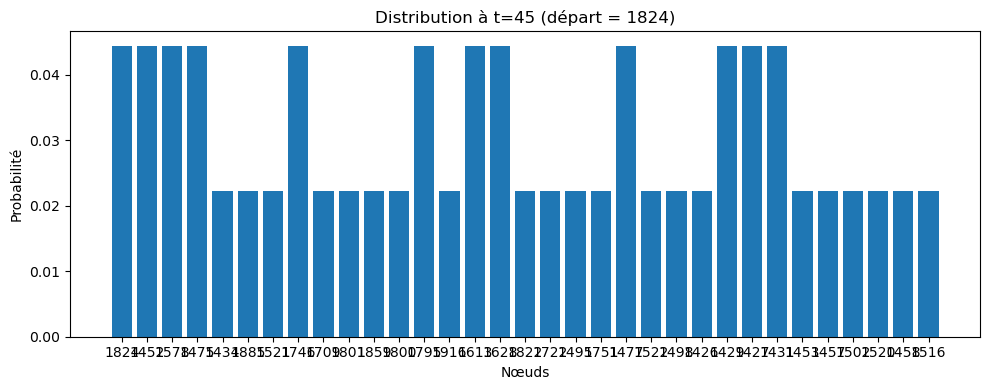

Distribution à t=90 pour start=1824 :
 {'1824': 0.022222222222222223, '1452': 0.022222222222222223, '1578': 0.022222222222222223, '1475': 0.022222222222222223, '1434': 0.011111111111111112, '1885': 0.011111111111111112, '1521': 0.011111111111111112, '1746': 0.022222222222222223, '1709': 0.011111111111111112, '1801': 0.011111111111111112, '1859': 0.011111111111111112, '1800': 0.011111111111111112, '1795': 0.03333333333333333, '1916': 0.011111111111111112, '1613': 0.022222222222222223, '1628': 0.022222222222222223, '1822': 0.011111111111111112, '1722': 0.011111111111111112, '1495': 0.011111111111111112, '1751': 0.011111111111111112, '1477': 0.022222222222222223, '1522': 0.011111111111111112, '1498': 0.011111111111111112, '1426': 0.011111111111111112, '1429': 0.03333333333333333, '1427': 0.03333333333333333, '1431': 0.03333333333333333, '1453': 0.011111111111111112, '1457': 0.022222222222222223, '1502': 0.011111111111111112, '1520': 0.011111111111111112, '1458': 0.011111111111111112, '151

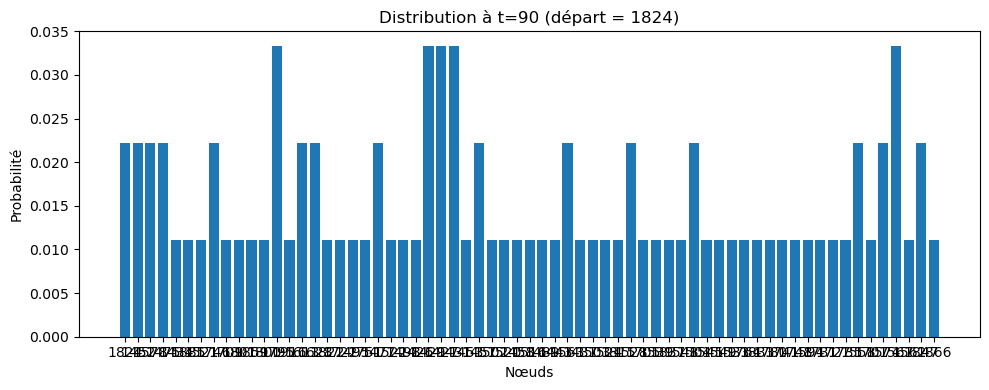

Distribution à t=600 pour start=1824 :
 {'1824': 0.0033333333333333335, '1452': 0.005, '1578': 0.016666666666666666, '1475': 0.005, '1434': 0.0033333333333333335, '1885': 0.0016666666666666668, '1521': 0.0033333333333333335, '1746': 0.005, '1709': 0.0016666666666666668, '1801': 0.0033333333333333335, '1859': 0.0033333333333333335, '1800': 0.0033333333333333335, '1795': 0.005, '1916': 0.011666666666666667, '1613': 0.011666666666666667, '1628': 0.021666666666666667, '1822': 0.005, '1722': 0.005, '1495': 0.005, '1751': 0.0033333333333333335, '1477': 0.005, '1522': 0.008333333333333333, '1498': 0.006666666666666667, '1426': 0.005, '1429': 0.006666666666666667, '1427': 0.006666666666666667, '1431': 0.008333333333333333, '1453': 0.0016666666666666668, '1457': 0.0033333333333333335, '1502': 0.005, '1520': 0.0016666666666666668, '1458': 0.008333333333333333, '1516': 0.0033333333333333335, '1489': 0.0033333333333333335, '1443': 0.005, '1563': 0.005, '1437': 0.0033333333333333335, '1503': 0.0033

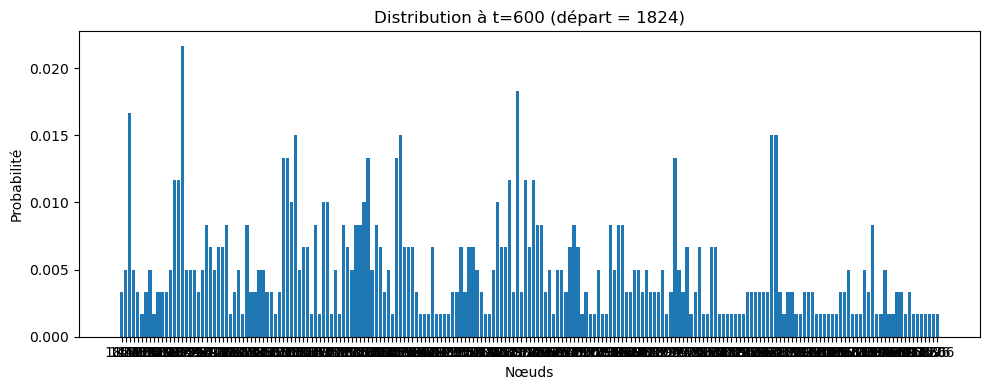

In [31]:
# ----------------------------
# SIMULATION POUR 4 TEMPS & 2 CONDITIONS INITIALES
# ----------------------------

times = [15, 45, 90, 600]
start_nodes = ['1789', '1824']

results = {}  # {start_node: {time: distribution_probs}}

for s in start_nodes:
    print(f"\n=== Simulation depuis le nœud {s} ===")

    # marche complète jusqu’au temps max
    max_time = max(times)
    full_walk = weighted_random_walk(G1, s, max_time, weight='duration')

    results[s] = {}

    # extraire la distribution à chaque t
    for t in times:
        partial_walk = full_walk[:t]  # tronquer le chemin
        _, probs = visit_histogram(partial_walk)
        results[s][t] = probs

        print(f"Distribution à t={t} pour start={s} :\n", probs)

        # Plot
        plot_distribution(
            probs,
            title=f"Distribution à t={t} (départ = {s})"
        )



# Stabilité de Markov

In [32]:
# JOUR 1

# 1. Commençons par définir une matrice de transition

def markov_transition_matrix(G1, weight="duration"):
    A1 = nx.to_numpy_array(G1, weight=weight)
    row_sums = A1.sum(axis=1)
    P = A1 / row_sums[:, None]
    return P

# 2. Puissance matricielle 
def compute_M_t(P, t):
    return np.linalg.matrix_power(P, t)

# 3. Partition -> matrice H 
def partition_matrix(partition1, nodes):
    communities = list(set(partition1.values()))
    k = len(communities)
    H = np.zeros((len(nodes), k))
    for i, node in enumerate(nodes):
        comm_id = partition1[node]
        H[i, communities.index(comm_id)] = 1
    return H

#  4. Stabilité de Markov 
def markov_stability(P_t, H, pi):
    Pi = np.diag(pi)
    R_t = H.T @ (Pi @ P_t - np.outer(pi, pi)) @ H
    return np.trace(R_t)

# 5. Fonction principale 
def compute_markov_stability(G1, times):
    # 1. Transition Markovienne
    P = markov_transition_matrix(G1, weight="duration")

    # 2. Distribution stationnaire
    degrees = np.array([d for _, d in G1.degree(weight="duration")], dtype=float)
    pi = degrees / degrees.sum()

    nodes = sorted(G1.nodes())

    # partition Louvain unique Déjà fait plus faut dans le code, donc plus nécessaire???
    partition1 = community_louvain.best_partition(G1, weight="duration")

    # matrice H
    H = partition_matrix(partition1, nodes)

    results = []  

    for t in times:
        P_t = compute_M_t(P, t)
        r_t = markov_stability(P_t, H, pi)
        results.append((t, r_t))

    return results, partition1


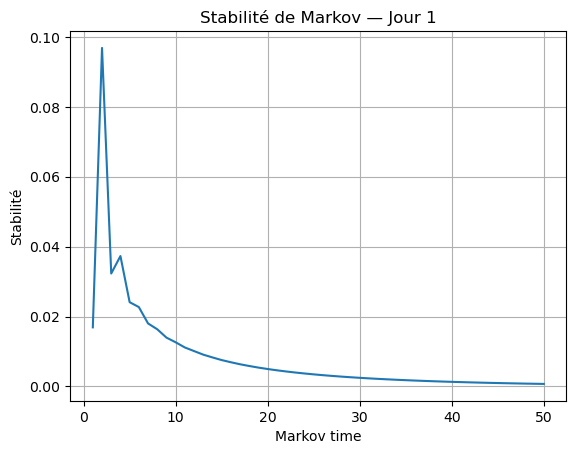

In [33]:
times = range(1, 51)
results, partition1 = compute_markov_stability(G1, times)

times = [r[0] for r in results]
stabilities = [r[1] for r in results]

plt.plot(times, stabilities)
plt.xlabel("Markov time")
plt.ylabel("Stabilité")
plt.title("Stabilité de Markov — Jour 1")
plt.grid(True)
plt.show()


# Processus épidémique

In [34]:
# Processus épidémique

